In this notebook, would have 6 scenarios to solve the problem. Generally differentiate by the use of the data\
1. Combining all the A1, A2, A3 into one dataframe and combining all the B1, B2, B3, B4, B5,B7 into another dataframe.
2. Combining all the A1, A2, A3 and B1, B2, B3, B4, B5,B7 into one dataframe.\
Each of the above data scenario would have 3 scenarios to train
   1. Using 10-fold cross validation
   2. Using 75% train and 25% test split
   3. Using 50% train and 25% validation and 25% test split

# Data Loading and Preprocessing

In [1]:
import pandas as pd

In [2]:
A1 = pd.read_excel('data/CPA1.xlsx')
A2 = pd.read_excel('data/CPA2.xlsx')
A3 = pd.read_excel('data/CPA3.xlsx')

In [3]:
A1.head()

,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.446692,0.220117,0.144672,0.106003,0.082516,A
1,0.442455,0.219658,0.145039,0.107494,0.085354,A
2,0.446993,0.220535,0.144443,0.105565,0.082465,A
3,0.457090,0.221898,0.141954,0.101666,0.077392,A
4,0.447407,0.220674,0.143812,0.105975,0.082134,A


In [4]:
A2.head()

,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.448457,0.220860,0.143938,0.104903,0.081841,B
1,0.448288,0.221315,0.144335,0.104964,0.081099,B
2,0.448916,0.221049,0.143741,0.105198,0.081096,B
3,0.449600,0.221141,0.144107,0.104930,0.080222,B
4,0.451886,0.221594,0.143987,0.103718,0.078816,B


In [5]:
A3.head()

,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.446692,0.220117,0.144672,0.106003,0.082516,A
1,0.442455,0.219658,0.145039,0.107494,0.085354,A
2,0.446993,0.220535,0.144443,0.105565,0.082465,A
3,0.457090,0.221898,0.141954,0.101666,0.077392,A
4,0.447407,0.220674,0.143812,0.105975,0.082134,A


In [6]:
#count the number of class in the file
A1_counts = A1['kelas'].value_counts()
A2_counts = A2['kelas'].value_counts()
A3_counts = A3['kelas'].value_counts()
print(A1_counts)
print(A2_counts)
print(A3_counts)

kelas
A    100
E    100
Name: count, dtype: int64
kelas
B    100
E    100
Name: count, dtype: int64
kelas
A    200
E    100
Name: count, dtype: int64


In [7]:
B1 = pd.read_excel('data/CPB1.xlsx')
B2 = pd.read_excel('data/CPB2.xlsx')
B3 = pd.read_excel('data/CPB3.xlsx')
B4 = pd.read_excel('data/CPB4.xlsx')
B5 = pd.read_excel('data/CPB5.xlsx')
B6 = pd.read_excel('data/CPB6.xlsx')
B7 = pd.read_excel('data/CPB7.xlsx')

In [8]:
B1.head()

,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.446692,0.220117,0.144672,0.106003,0.082516,A
1,0.442455,0.219658,0.145039,0.107494,0.085354,A
2,0.446993,0.220535,0.144443,0.105565,0.082465,A
3,0.457090,0.221898,0.141954,0.101666,0.077392,A
4,0.447407,0.220674,0.143812,0.105975,0.082134,A


In [9]:
B2.head()

,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.446692,0.220117,0.144672,0.106003,0.082516,A
1,0.442455,0.219658,0.145039,0.107494,0.085354,A
2,0.446993,0.220535,0.144443,0.105565,0.082465,A
3,0.457090,0.221898,0.141954,0.101666,0.077392,A
4,0.447407,0.220674,0.143812,0.105975,0.082134,A


In [10]:
B1_counts = B1['kelas'].value_counts()
B2_counts = B2['kelas'].value_counts()
B3_counts = B3['kelas'].value_counts()
B4_counts = B4['kelas'].value_counts()
B5_counts = B5['kelas'].value_counts()
B6_counts = B6['kelas'].value_counts()
B7_counts = B7['kelas'].value_counts()
print(B1_counts)
print(B2_counts)
print(B3_counts)
print(B4_counts)
print(B5_counts)
print(B6_counts)
print(B7_counts)

kelas
A    100
C    100
Name: count, dtype: int64
kelas
A    100
D    100
Name: count, dtype: int64
kelas
B    100
C    100
Name: count, dtype: int64
kelas
B    100
D    100
Name: count, dtype: int64
kelas
A    200
C    100
Name: count, dtype: int64
kelas
A    200
D    100
Name: count, dtype: int64
kelas
A    200
C    200
Name: count, dtype: int64


In [11]:
B1_counts.iloc[0]

100

In [12]:
# write down the value counts as string with this format
# BX file have BX_counts.iloc[0] data labeled as BX_counts.index[0] and  BX_counts.iloc[1] data labeled as BX_counts.index[1], and so on
# for example: B1 file have 100 data labeled as A class and 100 data labeled as C class
# you should write it as "B1 file have 100 data labeled as A class and 100 data labeled as C class"
for i in range(1, 8):
    B_counts = eval(f'B{i}_counts')
    B_counts_str = f'B{i}_counts_str'
    exec(f'{B_counts_str} = f"B{i} file have {B_counts.iloc[0]} data labeled as {B_counts.index[0]} class and {B_counts.iloc[1]} data labeled as {B_counts.index[1]} class"')
    print(eval(B_counts_str))

B1 file have 100 data labeled as A class and 100 data labeled as C class
B2 file have 100 data labeled as A class and 100 data labeled as D class
B3 file have 100 data labeled as B class and 100 data labeled as C class
B4 file have 100 data labeled as B class and 100 data labeled as D class
B5 file have 200 data labeled as A class and 100 data labeled as C class
B6 file have 200 data labeled as A class and 100 data labeled as D class
B7 file have 200 data labeled as A class and 200 data labeled as C class


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
def count_metric(y_true, y_pred):
    tp, fp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    
    # manually count sensitivity, specificity, and f1-score
    sensitivity = tp / (tp + fp)
    specificity = 1 - sensitivity
    f1_score = 2 * (sensitivity * specificity) / (sensitivity + specificity)
    return confusion, accuracy, sensitivity, specificity, f1_score

# A Dataframe and B Dataframe Scenario

In [14]:
# concatenate the data from all the files
A = pd.concat([A1, A2, A3])
B = pd.concat([B1, B2, B3, B4, B5, B6, B7])

In [15]:
# Coba dengan hanya data A dan B
A_value_counts = A['kelas'].value_counts()
B_value_counts = B['kelas'].value_counts()
print(A_value_counts)
print(B_value_counts)

kelas
A    300
E    300
B    100
Name: count, dtype: int64
kelas
A    800
C    500
D    300
B    200
Name: count, dtype: int64


## 10-Fold Cross Validation

In [16]:
# Define KFold object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Define metrics function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average="weighted")  # Macro-average for imbalanced data
    specificity = 1 - recall_score(y_test, y_pred, average="weighted", pos_label="not_selected")  # Macro-average for imbalanced data
    f1 = f1_score(y_test, y_pred, average="weighted")  # Macro-average for imbalanced data

    print(f"Metrics:")
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tSensitivity: {sensitivity:.4f}")
    print(f"\tSpecificity: {specificity:.4f}")
    print(f"\tF1-Score: {f1:.4f}")

# K-Nearest Neighbors (K-NN) Classification
print("**K-Nearest Neighbors (K-NN):**")
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y_test[test_index]

    # Train-test split within fold (optional, for consistency with SVM)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
    evaluate_model(knn, X_train, X_val, y_train, y_val)

# SVM Classification
print("**Support Vector Machine (SVM):**")
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y_test[test_index]

    # Train-test split within fold (optional)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    svm = SVC(kernel='linear')  # Adjust kernel and other parameters as needed
    evaluate_model(svm, X_train, X_val, y_train, y_val)

NameError: name 'KFold' is not defined

In [ ]:
A_used = A.groupby('kelas').apply(lambda x: x.sample(n=100)).reset_index(drop=True)
A_used_value_counts = A_used['kelas'].value_counts()
print(A_used_value_counts)
B_used = B.groupby('kelas').apply(lambda x: x.sample(n=100)).reset_index(drop=True)
B_used_value_counts = B_used['kelas'].value_counts()
print(B_used_value_counts)

kelas
A    100
B    100
E    100
Name: count, dtype: int64
kelas
A    100
B    100
C    100
D    100
Name: count, dtype: int64


In [ ]:
# convert kelas from 'A', 'B', 'C', 'D', 'E' to 0, 1, 2, 3, 4
A_target = A_target.apply(lambda x: ord(x) - ord('A'))
B_target = B_target.apply(lambda x: ord(x) - ord('A'))

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ten_fold_cv = LeaveOneOut()
from sklearn.neighbors import KNeighborsClassifier
KNN_model_A = KNeighborsClassifier(n_neighbors=3)
KNN_model_B = KNeighborsClassifier(n_neighbors=4)
from sklearn.svm import SVC
SVM_model_A = SVC(kernel='sigmoid')
SVM_model_B = SVC(kernel='sigmoid')

In [ ]:
for train_index, test_index in ten_fold_cv.split(A_feature):
    A_train_feature, A_test_feature = A_feature.iloc[train_index], A_feature.iloc[test_index]
    A_train_target, A_test_target = A_target.iloc[train_index], A_target.iloc[test_index]
    B_train_feature, B_test_feature = B_feature.iloc[train_index], B_feature.iloc[test_index]
    B_train_target, B_test_target = B_target.iloc[train_index], B_target.iloc[test_index]

    A_train_feature_scaled = scaler.fit_transform(A_train_feature)
    A_test_feature_scaled = scaler.transform(A_test_feature)
    B_train_feature_scaled = scaler.fit_transform(B_train_feature)
    B_test_feature_scaled = scaler.transform(B_test_feature)

    KNN_model_A.fit(A_train_feature_scaled, A_train_target)
    KNN_prediction_A = KNN_model_A.predict(A_test_feature_scaled)
    SVM_model_A.fit(A_train_feature_scaled, A_train_target)
    SVM_prediction_A = SVM_model_A.predict(A_test_feature_scaled)

    KNN_model_B.fit(B_train_feature_scaled, B_train_target)
    KNN_prediction_B = KNN_model_B.predict(B_test_feature_scaled)
    SVM_model_B.fit(B_train_feature_scaled, B_train_target)
    SVM_prediction_B = SVM_model_B.predict(B_test_feature_scaled)

    
    KNN_A_metric = count_metric(A_test_target, KNN_prediction_A)
    SVM_A_metric = count_metric(A_test_target, SVM_prediction_A)
    KNN_B_metric = count_metric(B_test_target, KNN_prediction_B)
    SVM_B_metric = count_metric(B_test_target, SVM_prediction_B)

    print("KNN A:", KNN_A_metric)
    print("SVM A:", SVM_A_metric)
    print("KNN B:", KNN_B_metric)
    print("SVM B:", SVM_B_metric)

## 75% Train and 25% Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_A_75_25 = A.drop(columns='kelas', axis=1)
Y_A_75_25 = A['kelas']
X_train_75_25, X_test_75_25, Y_train_75_25, Y_test_75_25 = train_test_split(X_A_75_25, Y_A_75_25, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_75_25)
X_test_scaled = scaler.transform(X_test_75_25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model_75_25 = KNeighborsClassifier(n_neighbors=3)
KNN_model_75_25.fit(X_train_scaled, Y_train_75_25)
KNN_prediction_75_25 = KNN_model_75_25.predict(X_test_scaled)

In [ ]:
from sklearn.svm import SVC
SVM_model_75_25 = SVC(kernel='sigmoid')
SVM_model_75_25.fit(X_train_scaled, Y_train_75_25)
SVM_prediction_75_25 = SVM_model_75_25.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
KNN_confusion_75_25= confusion_matrix(Y_test_75_25, KNN_prediction_75_25)
KNN_accuracy_75_25 = accuracy_score(Y_test_75_25, KNN_prediction_75_25)
SVM_confusion_75_25 = confusion_matrix(Y_test_75_25, SVM_prediction_75_25)
SVM_accuracy_75_25 = accuracy_score(Y_test_75_25, SVM_prediction_75_25)
print(KNN_confusion_75_25)
print(KNN_accuracy_75_25)
print(SVM_confusion_75_25)
print(SVM_accuracy_75_25)

[[183  37   0   0   0]
 [ 43   3   0   0   0]
 [ 10   5  75  17   3]
 [  8   1  18  34   6]
 [ 21   4   1   1  30]]
0.65
[[150   0  29  10  31]
 [ 34   0   6   0   6]
 [  5   0  73  28   4]
 [  7   0  38  18   4]
 [ 40   0  12   0   5]]
0.492


### B Dataframe

In [ ]:
X_B_75_25 = B.drop(columns='kelas', axis=1)
Y_B_75_25 = B['kelas']
X_B_train_75_25, X_B_test_75_25, Y_B_train_75_25, Y_B_test_75_25 = train_test_split(X_B_75_25, Y_B_75_25, test_size=0.25, random_state=42)

In [ ]:
A_feature = A.drop('kelas', axis=1)
A_target = A['kelas']
B_feature = B.drop('kelas', axis=1)
B_target = B['kelas']

In [ ]:
A_train, A_test, A_target_train, A_target_test = train_test_split(A_feature, A_target, test_size=0.2, random_state=0)
B_train, B_test, B_target_train, B_target_test = train_test_split(B_feature, B_target, test_size=0.2, random_state=0)

In [ ]:
# coba tanpa Scaler
KNN_model_A = KNeighborsClassifier(n_neighbors=3)
KNN_model_A.fit(A_train, A_target_train)
KNN_prediction_A = KNN_model_A.predict(A_test)

In [ ]:
KNN_confusion_A = confusion_matrix(A_target_test, KNN_prediction_A).ravel()
KNN_accuracy_A = accuracy_score(A_target_test, KNN_prediction_A)
print(KNN_confusion_A)
print(KNN_accuracy_A)

[46 13  7 13  0  6  4  0 51]
0.6928571428571428


In [ ]:
KNN_model_B = KNeighborsClassifier(n_neighbors=4)
KNN_model_B.fit(B_train, B_target_train)
KNN_prediction_B = KNN_model_B.predict(B_test)

In [ ]:
KNN_confusion_B = confusion_matrix(B_target_test, KNN_prediction_B).ravel()
KNN_accuracy_B = accuracy_score(B_target_test, KNN_prediction_B)
print(KNN_confusion_B)
print(KNN_accuracy_B)

[152   4   3   0  38   1   1   0   6   0  83  10   2   0  32  28]
0.7333333333333333


## 50% Train 25% Valid Split 25% Test Split

In [ ]:
train_ratio = 0.5
validation_ratio = 0.25
test_ratio = 0.25

In [ ]:
from sklearn.model_selection import train_test_split
X_remaining, X_test_50_25_25, Y_remaining, Y_test_50_25_25 = train_test_split(X, Y, test_size=test_ratio, random_state=0)

In [ ]:
ratio_remaining = 1 - test_ratio
ratio_validation_adjusted = validation_ratio / ratio_remaining

In [ ]:
from sklearn.model_selection import train_test_split
X_train_50_25_25, X_val, Y_train_50_25_25, Y_val = train_test_split(X_remaining, Y_remaining, test_size=ratio_validation_adjusted, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_50_25_25)
X_test_scaled = scaler.transform(X_test_50_25_25)

# Combined all data into one dataframe Scenario

In [ ]:
combined = pd.concat([A, B])
combined.describe()

In [ ]:
# make X as the feature and Y as the target
X = combined.drop('kelas', axis=1)
Y = combined['kelas']

In [ ]:
combined_value_counts = combined['kelas'].value_counts()
combined_value_counts

kelas
A    1100
C     500
E     300
B     300
D     300
Name: count, dtype: int64

# Each file would have their own model training and evaluation

In [2]:
import pandas as pd
def load_data(file_path):
    data = pd.read_excel(file_path)
    return data

In [3]:
def label_convert(data):
    data['kelas'] = data['kelas'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5})
    return data

In [4]:
from sklearn.model_selection import train_test_split
def seventy_five_twenty_five_split(data):
    X = data.drop('kelas', axis=1)
    Y = data['kelas']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    return X_train, X_test, Y_train, Y_test

def fifty_twenty_five_twenty_five_split(data):
    X = data.drop('kelas', axis=1)
    Y = data['kelas']
    test_ratio = 0.25
    validation_ratio = 0.25
    
    X_remaining, X_test, Y_remaining, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
    ratio_remaining = 1 - test_ratio
    
    ratio_validation_adjusted = validation_ratio / ratio_remaining
    X_train, X_val, Y_train, Y_val = train_test_split(X_remaining, Y_remaining, test_size=ratio_validation_adjusted, random_state=0)
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [5]:
from sklearn.svm import SVC
def SVM_model(kernel_type='linear'):
    model = SVC(kernel=kernel_type)
    return model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
def KNN_model(n_neighbors=2):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    return model

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
def count_metric(y_true, y_pred) -> dict:
    print(confusion_matrix(y_true, y_pred).ravel())
    cm_result = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    #if any of the value of tn or fp or fn or tp is 0, replace with 0.1
    tn, fp, fn, tp = [i if i != 0 else 0.1 for i in cm_result]
    
    # manually count sensitivity, specificity, and f1-score
    # limit calculation result to 3 digit after comma
    sensitivity:float = round(tp / (tp + fp), ndigits=3)
    specificity:float = round(1 - sensitivity, ndigits=3)
    f1_score:float = round(2 * (tp / (tp + fp) * tp / (tp + fn)) / ((tp / (tp + fp)) + (tp / (tp + fn))), ndigits=3)
    

    metric = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'f1_score': f1_score
    }
    return metric

In [8]:
# count average for 10 Fold metric
def count_average(metric_input:list) -> dict:
    accuracy_list = []
    sensitivity_list = []
    specificity_list = []
    f1_score_list = []
    for i in range(len(metric_input)):
        accuracy_list.append(metric_input[i]['accuracy'])
        sensitivity_list.append(metric_input[i]['sensitivity'])
        specificity_list.append(metric_input[i]['specificity'])
        f1_score_list.append(metric_input[i]['f1_score'])
    average_metric = {
        'accuracy': sum(accuracy_list) / len(accuracy_list),
        'sensitivity': sum(sensitivity_list) / len(sensitivity_list),
        'specificity': sum(specificity_list) / len(specificity_list),
        'f1_score': sum(f1_score_list) / len(f1_score_list)
    }
    # rounding the metric into 3 digit behind comma
    for key, value in average_metric.items():
        average_metric[key] = round(value, ndigits=3)
    
    return average_metric

In [9]:
all_metric_data = dict()
def add_metric_data(file, model_type, data_split, metric):
    file['model_type']

In [10]:
all_metric_data = dict()
def add_metric_data(file:str, data_split:str, model_type:str, metric : dict):
    """
    Add metric data to the all_metric_data dictionary.

    Parameters:
    file (str): The file name.
    data_split (str): The data split (e.g., train, test, validation).
    model_type (str): The type of model.
    metric (float): The metric value.
    Example :
    add_metric_data('A2', '75_25', 'SVM',{
                    'accuracy': 0.47,
                    'sensitivity': 0.47,
                    'specificity': 0.55,
                    'f1_score': 0.5
                }
            )
    Returns:
    None
    """
    if file not in all_metric_data:
        all_metric_data[file] = dict()
    if data_split not in all_metric_data[file]:
        all_metric_data[file][data_split] = dict()
    all_metric_data[file][data_split][model_type] = metric

In [11]:
#export as json
import json
def export_to_json():
    with open('metric_result.json', 'w') as f:
        json.dump(all_metric_data, f, indent=2)

## A1

In [12]:
A1 = load_data('data/CPA1.xlsx')

#### A1 10-Fold Cross Validation

In [13]:
A1_ten_fold_data = label_convert(A1)

In [14]:
X_A1_ten_fold = A1_ten_fold_data.drop('kelas', axis=1)
Y_A1_ten_fold = A1_ten_fold_data['kelas']

A1_ten_fold_cv_SVM = SVM_model()
A1_ten_fold_cv_KNN = KNN_model()

from sklearn.model_selection import KFold
A1_ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)
A1_tenfold_SVM_metric = []
A1_tenfold_KNN_metric = []

for A1_train_index, A_test_index in A1_ten_fold.split(X_A1_ten_fold):
    A1_X_train, A1_X_test = X_A1_ten_fold.iloc[A1_train_index], X_A1_ten_fold.iloc[A_test_index]
    A1_Y_train, A1_Y_test = Y_A1_ten_fold.iloc[A1_train_index], Y_A1_ten_fold.iloc[A_test_index]

    A1_ten_fold_cv_SVM.fit(A1_X_train, A1_Y_train)
    A1_ten_fold_cv_KNN.fit(A1_X_test, A1_Y_test)

    A1_SVM_prediction = A1_ten_fold_cv_SVM.predict(A1_X_test)
    A1_KNN_prediction = A1_ten_fold_cv_KNN.predict(A1_X_test)

    A1_ten_fold_cv_SVM_metric = count_metric(A1_Y_test, A1_SVM_prediction)
    A1_ten_fold_cv_KNN_metric = count_metric(A1_Y_test, A1_KNN_prediction)

    A1_tenfold_SVM_metric.append(A1_ten_fold_cv_SVM_metric)
    A1_tenfold_KNN_metric.append(A1_ten_fold_cv_KNN_metric)

[print(i,score) for i,score in enumerate(A1_tenfold_SVM_metric)]
print('\n')
[print(i,score) for i,score in enumerate(A1_tenfold_KNN_metric)]
print('\n')
# print(A1_tenfold_KNN_metric)

[ 0 10  0 10]
[10  0  1  9]
[ 0 11  0  9]
[11  0  3  6]
[1 9 1 9]
[10  0  5  5]
[ 9  0 11  0]
[9 0 4 7]
[ 0 11  0  9]
[11  0  3  6]
[ 9  0 11  0]
[ 9  0 10  1]
[4 6 1 9]
[10  0  5  5]
[ 0 12  0  8]
[12  0  6  2]
[ 9  0 11  0]
[9 0 4 7]
[ 9  0 11  0]
[9 0 4 7]
0 {'accuracy': 0.5, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.664}
1 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
2 {'accuracy': 0.5, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.643}
3 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
4 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
5 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
6 {'accuracy': 0.65, 'sensitivity': 0.6, 'specificity': 0.4, 'f1_score': 0.72}
7 {'accuracy': 0.4, 'sensitivity': 0.4, 'specificity': 0.6, 'f1_score': 0.569}
8 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
9 {'accuracy': 0.45,

In [15]:
A1_SVM_Metric_Average = count_average(A1_tenfold_SVM_metric)
A1_KNN_Metric_Average = count_average(A1_tenfold_KNN_metric)
add_metric_data('A1', '10_fold', 'SVM', A1_SVM_Metric_Average)
add_metric_data('A1', '10_fold', 'KNN', A1_KNN_Metric_Average)

#### A1 75% Train and 25% Test Split

In [16]:
X_A1_75_25, X_A1_test_75_25, Y_A1_75_25, Y_A1_test_75_25 = seventy_five_twenty_five_split(A1)
A1_SVM_75_25 = SVM_model()
A1_KNN_75_25 = KNN_model()

In [17]:
A1_SVM_75_25.fit(X_A1_75_25, Y_A1_75_25)
A1_KNN_75_25.fit(X_A1_75_25, Y_A1_75_25)
A1_SVM_75_25_prediction = A1_SVM_75_25.predict(X_A1_test_75_25)
A1_KNN_75_25_prediction = A1_KNN_75_25.predict(X_A1_test_75_25)

In [18]:
A1_SVM_75_25_metric = count_metric(Y_A1_test_75_25, A1_SVM_75_25_prediction)
A1_KNN_75_25_metric = count_metric(Y_A1_test_75_25, A1_KNN_75_25_prediction)
add_metric_data('A1', '75_25', 'SVM', A1_SVM_75_25_metric)
add_metric_data('A1', '75_25', 'KNN', A1_KNN_75_25_metric)

[ 0 27  0 23]
[23  4  9 14]


#### A1 50% Train 25% Valid Split 25% Test Split

In [19]:
X_A1_50_25_25, X_A1_val, X_A1_test_50_25_25, Y_A1_50_25_25, Y_A1_val, Y_A1_test_50_25_25 = fifty_twenty_five_twenty_five_split(A1)

In [20]:
A1_SVM_50_25_25 = SVM_model()
A1_KNN_50_25_25 = KNN_model()

In [21]:
A1_SVM_50_25_25.fit(X_A1_50_25_25, Y_A1_50_25_25)
A1_KNN_50_25_25.fit(X_A1_50_25_25, Y_A1_50_25_25)
A1_SVM_50_25_25_prediction = A1_SVM_50_25_25.predict(X_A1_test_50_25_25)
A1_KNN_50_25_25_prediction = A1_KNN_50_25_25.predict(X_A1_test_50_25_25)

In [22]:
A1_SVM_50_25_25_metric = count_metric(Y_A1_test_50_25_25, A1_SVM_50_25_25_prediction)
A1_KNN_50_25_25_metric = count_metric(Y_A1_test_50_25_25, A1_KNN_50_25_25_prediction)
A1_SVM_50_25_25_metric, A1_KNN_50_25_25_metric

[23  0 27  0]
[20  3 16 11]


({'accuracy': 0.46, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.007},
 {'accuracy': 0.62,
  'sensitivity': 0.786,
  'specificity': 0.214,
  'f1_score': 0.537})

**_NOTE:_** For 50% Training, 25% Validation and 25% Test Split, since the metric is worse, we didnt continue for other file

## A2

In [23]:
A2 = load_data('data/CPA2.xlsx')

#### A2 10-Fold Cross Validation

In [24]:
A2_ten_fold_data = label_convert(A2)

In [25]:
X_A2_ten_fold = A2_ten_fold_data.drop('kelas', axis=1)
Y_A2_ten_fold = A2_ten_fold_data['kelas']

A2_ten_fold_cv_SVM = SVM_model()
A2_ten_fold_cv_KNN = KNN_model()

from sklearn.model_selection import KFold
A2_ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)
A2_tenfold_SVM_metric = []
A2_tenfold_KNN_metric = []

for A2_train_index, A_test_index in A2_ten_fold.split(X_A2_ten_fold):
    A2_X_train, A2_X_test = X_A2_ten_fold.iloc[A2_train_index], X_A2_ten_fold.iloc[A_test_index]
    A2_Y_train, A2_Y_test = Y_A2_ten_fold.iloc[A2_train_index], Y_A2_ten_fold.iloc[A_test_index]

    A2_ten_fold_cv_SVM.fit(A2_X_train, A2_Y_train)
    A2_ten_fold_cv_KNN.fit(A2_X_test, A2_Y_test)

    A2_SVM_prediction = A2_ten_fold_cv_SVM.predict(A2_X_test)
    A2_KNN_prediction = A2_ten_fold_cv_KNN.predict(A2_X_test)

    A2_ten_fold_cv_SVM_metric = count_metric(A2_Y_test, A2_SVM_prediction)
    A2_ten_fold_cv_KNN_metric = count_metric(A2_Y_test, A2_KNN_prediction)

    A2_tenfold_SVM_metric.append(A2_ten_fold_cv_SVM_metric)
    A2_tenfold_KNN_metric.append(A2_ten_fold_cv_KNN_metric)

[print(i,score) for i,score in enumerate(A2_tenfold_SVM_metric)]
print('\n')
[print(i,score) for i,score in enumerate(A2_tenfold_KNN_metric)]
print('\n')
# print(A2_tenfold_KNN_metric)

[ 3  7  0 10]
[10  0  2  8]
[ 0 11  0  9]
[11  0  1  8]
[4 6 1 9]
[10  0  2  8]
[ 9  0 11  0]
[9 0 3 8]
[ 0 11  0  9]
[11  0  4  5]
[ 9  0 11  0]
[9 0 2 9]
[5 5 2 8]
[10  0  5  5]
[ 0 12  0  8]
[12  0  4  4]
[ 9  0 11  0]
[9 0 4 7]
[ 9  0 11  0]
[9 0 6 5]
0 {'accuracy': 0.65, 'sensitivity': 0.588, 'specificity': 0.412, 'f1_score': 0.738}
1 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
2 {'accuracy': 0.65, 'sensitivity': 0.6, 'specificity': 0.4, 'f1_score': 0.72}
3 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
4 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
5 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
6 {'accuracy': 0.65, 'sensitivity': 0.615, 'specificity': 0.385, 'f1_score': 0.696}
7 {'accuracy': 0.4, 'sensitivity': 0.4, 'specificity': 0.6, 'f1_score': 0.569}
8 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
9 {'accuracy':

In [26]:
A2_SVM_Metric_Average = count_average(A2_tenfold_SVM_metric)
A2_KNN_Metric_Average = count_average(A2_tenfold_KNN_metric)
add_metric_data('A2', '10_fold', 'SVM', A2_SVM_Metric_Average)
add_metric_data('A2', '10_fold', 'KNN', A2_KNN_Metric_Average)

#### A2 75% Train and 25% Test Split

In [27]:
X_A2_75_25, X_A2_test_75_25, Y_A2_75_25, Y_A2_test_75_25 = seventy_five_twenty_five_split(A2)
A2_SVM_75_25 = SVM_model()
A2_KNN_75_25 = KNN_model()

In [28]:
A2_SVM_75_25.fit(X_A2_75_25, Y_A2_75_25)
A2_KNN_75_25.fit(X_A2_75_25, Y_A2_75_25)
A2_SVM_75_25_prediction = A2_SVM_75_25.predict(X_A2_test_75_25)
A2_KNN_75_25_prediction = A2_KNN_75_25.predict(X_A2_test_75_25)

In [29]:
A2_SVM_75_25_metric = count_metric(Y_A2_test_75_25, A2_SVM_75_25_prediction)
A2_KNN_75_25_metric = count_metric(Y_A2_test_75_25, A2_KNN_75_25_prediction)
add_metric_data('A2', '75_25', 'SVM', A2_SVM_75_25_metric)
add_metric_data('A2', '75_25', 'KNN', A2_KNN_75_25_metric)

[ 0 27  0 23]
[26  1 11 12]


## A3

In [30]:
A3 = load_data('data/CPA3.xlsx')

#### A3 10-Fold Cross Validation

In [31]:
A3_ten_fold_data = label_convert(A3)

In [32]:
X_A3_ten_fold = A3_ten_fold_data.drop('kelas', axis=1)
Y_A3_ten_fold = A3_ten_fold_data['kelas']

A3_ten_fold_cv_SVM = SVM_model()
A3_ten_fold_cv_KNN = KNN_model()

from sklearn.model_selection import KFold
A3_ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)
A3_tenfold_SVM_metric = []
A3_tenfold_KNN_metric = []

for A3_train_index, A_test_index in A3_ten_fold.split(X_A3_ten_fold):
    A3_X_train, A3_X_test = X_A3_ten_fold.iloc[A3_train_index], X_A3_ten_fold.iloc[A_test_index]
    A3_Y_train, A3_Y_test = Y_A3_ten_fold.iloc[A3_train_index], Y_A3_ten_fold.iloc[A_test_index]

    A3_ten_fold_cv_SVM.fit(A3_X_train, A3_Y_train)
    A3_ten_fold_cv_KNN.fit(A3_X_test, A3_Y_test)

    A3_SVM_prediction = A3_ten_fold_cv_SVM.predict(A3_X_test)
    A3_KNN_prediction = A3_ten_fold_cv_KNN.predict(A3_X_test)

    A3_ten_fold_cv_SVM_metric = count_metric(A3_Y_test, A3_SVM_prediction)
    A3_ten_fold_cv_KNN_metric = count_metric(A3_Y_test, A3_KNN_prediction)

    A3_tenfold_SVM_metric.append(A3_ten_fold_cv_SVM_metric)
    A3_tenfold_KNN_metric.append(A3_ten_fold_cv_KNN_metric)

[print(i,score) for i,score in enumerate(A3_tenfold_SVM_metric)]
print('\n')
[print(i,score) for i,score in enumerate(A3_tenfold_KNN_metric)]
print('\n')
# print(A3_tenfold_KNN_metric)

[16  0 14  0]
[16  0  5  9]
[22  0  8  0]
[22  0  5  3]
[25  0  5  0]
[25  0  3  2]
[20  0 10  0]
[20  0  2  8]
[24  0  6  0]
[24  0  4  2]
[18  0 12  0]
[18  0  6  6]
[16  0 14  0]
[16  0  7  7]
[17  0 13  0]
[17  0  8  5]
[20  0 10  0]
[20  0  6  4]
[22  0  8  0]
[22  0  3  5]
0 {'accuracy': 0.5333333333333333, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.014}
1 {'accuracy': 0.7333333333333333, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.024}
2 {'accuracy': 0.8333333333333334, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.038}
3 {'accuracy': 0.6666666666666666, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.019}
4 {'accuracy': 0.8, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.032}
5 {'accuracy': 0.6, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.016}
6 {'accuracy': 0.5333333333333333, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.014}
7 {'accuracy': 0.5666666666666667, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.015

In [33]:
A3_SVM_Metric_Average = count_average(A3_tenfold_SVM_metric)
A3_KNN_Metric_Average = count_average(A3_tenfold_KNN_metric)
add_metric_data('A3', '10_fold', 'SVM', A3_SVM_Metric_Average)
add_metric_data('A3', '10_fold', 'KNN', A3_KNN_Metric_Average)

#### A3 75% Train and 25% Test Split

In [34]:
X_A3_75_25, X_A3_test_75_25, Y_A3_75_25, Y_A3_test_75_25 = seventy_five_twenty_five_split(A3)
A3_SVM_75_25 = SVM_model()
A3_KNN_75_25 = KNN_model()

In [35]:
A3_SVM_75_25.fit(X_A3_75_25, Y_A3_75_25)
A3_KNN_75_25.fit(X_A3_75_25, Y_A3_75_25)
A3_SVM_75_25_prediction = A3_SVM_75_25.predict(X_A3_test_75_25)
A3_KNN_75_25_prediction = A3_KNN_75_25.predict(X_A3_test_75_25)

In [36]:
A3_SVM_75_25_metric = count_metric(Y_A3_test_75_25, A3_SVM_75_25_prediction)
A3_KNN_75_25_metric = count_metric(Y_A3_test_75_25, A3_KNN_75_25_prediction)
add_metric_data('A3', '75_25', 'SVM', A3_SVM_75_25_metric)
add_metric_data('A3', '75_25', 'KNN', A3_KNN_75_25_metric)

[50  0 25  0]
[46  4 15 10]


## B1

In [38]:
B1 = load_data('data/CPB1.xlsx')

#### B1 10-Fold Cross Validation

In [39]:
B1_ten_fold_data = label_convert(B1)

In [40]:
X_B1_ten_fold = B1_ten_fold_data.drop('kelas', axis=1)
Y_B1_ten_fold = B1_ten_fold_data['kelas']

B1_ten_fold_cv_SVM = SVM_model()
B1_ten_fold_cv_KNN = KNN_model()

from sklearn.model_selection import KFold
B1_ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)
B1_tenfold_SVM_metric = []
B1_tenfold_KNN_metric = []

for B1_train_index, B_test_index in B1_ten_fold.split(X_B1_ten_fold):
    B1_X_train, B1_X_test = X_B1_ten_fold.iloc[B1_train_index], X_B1_ten_fold.iloc[B_test_index]
    B1_Y_train, B1_Y_test = Y_B1_ten_fold.iloc[B1_train_index], Y_B1_ten_fold.iloc[B_test_index]

    B1_ten_fold_cv_SVM.fit(B1_X_train, B1_Y_train)
    B1_ten_fold_cv_KNN.fit(B1_X_test, B1_Y_test)

    B1_SVM_prediction = B1_ten_fold_cv_SVM.predict(B1_X_test)
    B1_KNN_prediction = B1_ten_fold_cv_KNN.predict(B1_X_test)

    B1_ten_fold_cv_SVM_metric = count_metric(B1_Y_test, B1_SVM_prediction)
    B1_ten_fold_cv_KNN_metric = count_metric(B1_Y_test, B1_KNN_prediction)

    B1_tenfold_SVM_metric.append(B1_ten_fold_cv_SVM_metric)
    B1_tenfold_KNN_metric.append(B1_ten_fold_cv_KNN_metric)

[print(i,score) for i,score in enumerate(B1_tenfold_SVM_metric)]
print('\n')
[print(i,score) for i,score in enumerate(B1_tenfold_KNN_metric)]
print('\n')
# print(B1_tenfold_KNN_metric)


[ 1  9  0 10]
[10  0  1  9]
[ 0 11  0  9]
[11  0  3  6]
[ 4  6  0 10]
[10  0  2  8]
[ 9  0 11  0]
[ 9  0  1 10]
[ 0 11  0  9]
[11  0  5  4]
[ 9  0 11  0]
[ 9  0  0 11]
[6 4 1 9]
[10  0  4  6]
[ 0 12  0  8]
[12  0  1  7]
[ 9  0 11  0]
[9 0 3 8]
[ 9  0 11  0]
[9 0 2 9]
0 {'accuracy': 0.55, 'sensitivity': 0.526, 'specificity': 0.474, 'f1_score': 0.687}
1 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
2 {'accuracy': 0.7, 'sensitivity': 0.625, 'specificity': 0.375, 'f1_score': 0.766}
3 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
4 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
5 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
6 {'accuracy': 0.75, 'sensitivity': 0.692, 'specificity': 0.308, 'f1_score': 0.783}
7 {'accuracy': 0.4, 'sensitivity': 0.4, 'specificity': 0.6, 'f1_score': 0.569}
8 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018

In [41]:
B1_SVM_Metric_Average = count_average(B1_tenfold_SVM_metric)
B1_KNN_Metric_Average = count_average(B1_tenfold_KNN_metric)
add_metric_data('B1', '10_fold', 'SVM', B1_SVM_Metric_Average)
add_metric_data('B1', '10_fold', 'KNN', B1_KNN_Metric_Average)

#### B1 75% Train and 25% Test Split

In [42]:
X_B1_75_25, X_B1_test_75_25, Y_B1_75_25, Y_B1_test_75_25 = seventy_five_twenty_five_split(B1)
B1_SVM_75_25 = SVM_model()
B1_KNN_75_25 = KNN_model()

In [43]:
B1_SVM_75_25.fit(X_B1_75_25, Y_B1_75_25)
B1_KNN_75_25.fit(X_B1_75_25, Y_B1_75_25)
B1_SVM_75_25_prediction = B1_SVM_75_25.predict(X_B1_test_75_25)
B1_KNN_75_25_prediction = B1_KNN_75_25.predict(X_B1_test_75_25)

In [44]:
B1_SVM_75_25_metric = count_metric(Y_B1_test_75_25, B1_SVM_75_25_prediction)
B1_KNN_75_25_metric = count_metric(Y_B1_test_75_25, B1_KNN_75_25_prediction)
add_metric_data('B1', '75_25', 'SVM', B1_SVM_75_25_metric)
add_metric_data('B1', '75_25', 'KNN', B1_KNN_75_25_metric)

[ 0 27  0 23]
[24  3  7 16]


## B2

In [45]:
B2 = load_data('data/CPB2.xlsx')

#### B2 10-Fold Cross Validation

In [46]:
B2_ten_fold_data = label_convert(B2)

In [47]:
X_B2_ten_fold = B2_ten_fold_data.drop('kelas', axis=1)
Y_B2_ten_fold = B2_ten_fold_data['kelas']

B2_ten_fold_cv_SVM = SVM_model()
B2_ten_fold_cv_KNN = KNN_model()

from sklearn.model_selection import KFold
B2_ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)
B2_tenfold_SVM_metric = []
B2_tenfold_KNN_metric = []

for B2_train_index, B_test_index in B2_ten_fold.split(X_B2_ten_fold):
    B2_X_train, B2_X_test = X_B2_ten_fold.iloc[B2_train_index], X_B2_ten_fold.iloc[B_test_index]
    B2_Y_train, B2_Y_test = Y_B2_ten_fold.iloc[B2_train_index], Y_B2_ten_fold.iloc[B_test_index]

    B2_ten_fold_cv_SVM.fit(B2_X_train, B2_Y_train)
    B2_ten_fold_cv_KNN.fit(B2_X_test, B2_Y_test)

    B2_SVM_prediction = B2_ten_fold_cv_SVM.predict(B2_X_test)
    B2_KNN_prediction = B2_ten_fold_cv_KNN.predict(B2_X_test)

    B2_ten_fold_cv_SVM_metric = count_metric(B2_Y_test, B2_SVM_prediction)
    B2_ten_fold_cv_KNN_metric = count_metric(B2_Y_test, B2_KNN_prediction)

    B2_tenfold_SVM_metric.append(B2_ten_fold_cv_SVM_metric)
    B2_tenfold_KNN_metric.append(B2_ten_fold_cv_KNN_metric)

[print(i,score) for i,score in enumerate(B2_tenfold_SVM_metric)]
print('\n')
[print(i,score) for i,score in enumerate(B2_tenfold_KNN_metric)]
print('\n')
# print(B2_tenfold_KNN_metric)

[ 1  9  0 10]
[10  0  3  7]
[ 0 11  0  9]
[11  0  3  6]
[ 4  6  0 10]
[10  0  2  8]
[ 9  0 11  0]
[ 9  0  1 10]
[ 0 11  0  9]
[11  0  5  4]
[ 9  0 11  0]
[ 9  0  0 11]
[ 5  5  0 10]
[10  0  1  9]
[ 0 12  0  8]
[12  0  3  5]
[ 9  0 11  0]
[9 0 2 9]
[ 9  0 11  0]
[9 0 3 8]
0 {'accuracy': 0.55, 'sensitivity': 0.526, 'specificity': 0.474, 'f1_score': 0.687}
1 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
2 {'accuracy': 0.7, 'sensitivity': 0.625, 'specificity': 0.375, 'f1_score': 0.766}
3 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
4 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
5 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
6 {'accuracy': 0.75, 'sensitivity': 0.667, 'specificity': 0.333, 'f1_score': 0.797}
7 {'accuracy': 0.4, 'sensitivity': 0.4, 'specificity': 0.6, 'f1_score': 0.569}
8 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0

In [48]:
B2_SVM_Metric_Average = count_average(B1_tenfold_SVM_metric)
B2_KNN_Metric_Average = count_average(B1_tenfold_KNN_metric)
add_metric_data('B2', '10_fold', 'SVM', B2_SVM_Metric_Average)
add_metric_data('B2', '10_fold', 'KNN', B2_KNN_Metric_Average)

#### B2 75% Train and 25% Test Split

In [49]:
X_B2_75_25, X_B2_test_75_25, Y_B2_75_25, Y_B2_test_75_25 = seventy_five_twenty_five_split(B2)
B2_SVM_75_25 = SVM_model()
B2_KNN_75_25 = KNN_model()

In [50]:
B2_SVM_75_25.fit(X_B2_75_25, Y_B2_75_25)
B2_KNN_75_25.fit(X_B2_75_25, Y_B2_75_25)
B2_SVM_75_25_prediction = B2_SVM_75_25.predict(X_B2_test_75_25)
B2_KNN_75_25_prediction = B2_KNN_75_25.predict(X_B2_test_75_25)

In [51]:
B2_SVM_75_25_metric = count_metric(Y_B2_test_75_25, B2_SVM_75_25_prediction)
B2_KNN_75_25_metric = count_metric(Y_B2_test_75_25, B2_KNN_75_25_prediction)
add_metric_data('B2', '75_25', 'SVM', B2_SVM_75_25_metric)
add_metric_data('B2', '75_25', 'KNN', B2_KNN_75_25_metric)

[ 0 27  0 23]
[23  4  7 16]


## B3

In [52]:
B3 = load_data('data/CPB3.xlsx')

#### B3 10-Fold Cross Validation

In [53]:
B3_ten_fold_data = label_convert(B3)

In [54]:
X_B3_ten_fold = B3_ten_fold_data.drop('kelas', axis=1)
Y_B3_ten_fold = B3_ten_fold_data['kelas']

B3_ten_fold_cv_SVM = SVM_model()
B3_ten_fold_cv_KNN = KNN_model()

from sklearn.model_selection import KFold
B3_ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)
B3_tenfold_SVM_metric = []
B3_tenfold_KNN_metric = []

for B3_train_index, B_test_index in B3_ten_fold.split(X_B3_ten_fold):
    B3_X_train, B3_X_test = X_B3_ten_fold.iloc[B3_train_index], X_B3_ten_fold.iloc[B_test_index]
    B3_Y_train, B3_Y_test = Y_B3_ten_fold.iloc[B3_train_index], Y_B3_ten_fold.iloc[B_test_index]

    B3_ten_fold_cv_SVM.fit(B3_X_train, B3_Y_train)
    B3_ten_fold_cv_KNN.fit(B3_X_test, B3_Y_test)

    B3_SVM_prediction = B3_ten_fold_cv_SVM.predict(B3_X_test)
    B3_KNN_prediction = B3_ten_fold_cv_KNN.predict(B3_X_test)

    B3_ten_fold_cv_SVM_metric = count_metric(B3_Y_test, B3_SVM_prediction)
    B3_ten_fold_cv_KNN_metric = count_metric(B3_Y_test, B3_KNN_prediction)

    B3_tenfold_SVM_metric.append(B3_ten_fold_cv_SVM_metric)
    B3_tenfold_KNN_metric.append(B3_ten_fold_cv_KNN_metric)

[print(i,score) for i,score in enumerate(B3_tenfold_SVM_metric)]
print('\n')
[print(i,score) for i,score in enumerate(B3_tenfold_KNN_metric)]
print('\n')
# print(B3_tenfold_KNN_metric)


[ 4  6  0 10]
[10  0  2  8]
[ 0 11  0  9]
[11  0  1  8]
[ 7  3  0 10]
[10  0  1  9]
[ 9  0 11  0]
[9 0 4 7]
[ 0 11  0  9]
[11  0  2  7]
[ 9  0 11  0]
[ 9  0  0 11]
[7 3 1 9]
[10  0  5  5]
[ 0 12  0  8]
[12  0  0  8]
[ 9  0 11  0]
[9 0 2 9]
[ 9  0 11  0]
[9 0 2 9]
0 {'accuracy': 0.7, 'sensitivity': 0.625, 'specificity': 0.375, 'f1_score': 0.766}
1 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
2 {'accuracy': 0.85, 'sensitivity': 0.769, 'specificity': 0.231, 'f1_score': 0.866}
3 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
4 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
5 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
6 {'accuracy': 0.8, 'sensitivity': 0.75, 'specificity': 0.25, 'f1_score': 0.818}
7 {'accuracy': 0.4, 'sensitivity': 0.4, 'specificity': 0.6, 'f1_score': 0.569}
8 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
9 {'a

In [55]:
B3_SVM_Metric_Average = count_average(B3_tenfold_SVM_metric)
B3_KNN_Metric_Average = count_average(B3_tenfold_KNN_metric)
add_metric_data('B3', '10_fold', 'SVM', B3_SVM_Metric_Average)
add_metric_data('B3', '10_fold', 'KNN', B3_KNN_Metric_Average)

#### B3 75% Train and 25% Test Split

In [56]:
X_B3_75_25, X_B3_test_75_25, Y_B3_75_25, Y_B3_test_75_25 = seventy_five_twenty_five_split(B3)
B3_SVM_75_25 = SVM_model()
B3_KNN_75_25 = KNN_model()

In [57]:
B3_SVM_75_25.fit(X_B3_75_25, Y_B3_75_25)
B3_KNN_75_25.fit(X_B3_75_25, Y_B3_75_25)
B3_SVM_75_25_prediction = B3_SVM_75_25.predict(X_B3_test_75_25)
B3_KNN_75_25_prediction = B3_KNN_75_25.predict(X_B3_test_75_25)

In [58]:
B3_SVM_75_25_metric = count_metric(Y_B3_test_75_25, B3_SVM_75_25_prediction)
B3_KNN_75_25_metric = count_metric(Y_B3_test_75_25, B3_KNN_75_25_prediction)
add_metric_data('B3', '75_25', 'SVM', B3_SVM_75_25_metric)
add_metric_data('B3', '75_25', 'KNN', B3_KNN_75_25_metric)

[ 0 27  0 23]
[24  3  8 15]


## B4

In [59]:
B4 = load_data('data/CPB4.xlsx')

#### B4 10-Fold Cross Validation

In [60]:
B4_ten_fold_data = label_convert(B4)

In [61]:
X_B4_ten_fold = B4_ten_fold_data.drop('kelas', axis=1)
Y_B4_ten_fold = B4_ten_fold_data['kelas']

B4_ten_fold_cv_SVM = SVM_model()
B4_ten_fold_cv_KNN = KNN_model()

from sklearn.model_selection import KFold
B4_ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)
B4_tenfold_SVM_metric = []
B4_tenfold_KNN_metric = []

for B4_train_index, B_test_index in B4_ten_fold.split(X_B4_ten_fold):
    B4_X_train, B4_X_test = X_B4_ten_fold.iloc[B4_train_index], X_B4_ten_fold.iloc[B_test_index]
    B4_Y_train, B4_Y_test = Y_B4_ten_fold.iloc[B4_train_index], Y_B4_ten_fold.iloc[B_test_index]

    B4_ten_fold_cv_SVM.fit(B4_X_train, B4_Y_train)
    B4_ten_fold_cv_KNN.fit(B4_X_test, B4_Y_test)

    B4_SVM_prediction = B4_ten_fold_cv_SVM.predict(B4_X_test)
    B4_KNN_prediction = B4_ten_fold_cv_KNN.predict(B4_X_test)

    B4_ten_fold_cv_SVM_metric = count_metric(B4_Y_test, B4_SVM_prediction)
    B4_ten_fold_cv_KNN_metric = count_metric(B4_Y_test, B4_KNN_prediction)

    B4_tenfold_SVM_metric.append(B4_ten_fold_cv_SVM_metric)
    B4_tenfold_KNN_metric.append(B4_ten_fold_cv_KNN_metric)

[print(i,score) for i,score in enumerate(B4_tenfold_SVM_metric)]
print('\n')
[print(i,score) for i,score in enumerate(B4_tenfold_KNN_metric)]
print('\n')
# print(B4_tenfold_KNN_metric)


[ 4  6  0 10]
[10  0  4  6]
[ 0 11  0  9]
[11  0  1  8]
[ 7  3  0 10]
[10  0  1  9]
[ 9  0 11  0]
[9 0 2 9]
[ 0 11  0  9]
[11  0  3  6]
[ 9  0 11  0]
[ 9  0  0 11]
[ 6  4  0 10]
[10  0  0 10]
[ 0 12  0  8]
[12  0  1  7]
[ 9  0 11  0]
[9 0 2 9]
[ 9  0 11  0]
[9 0 2 9]
0 {'accuracy': 0.7, 'sensitivity': 0.625, 'specificity': 0.375, 'f1_score': 0.766}
1 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
2 {'accuracy': 0.85, 'sensitivity': 0.769, 'specificity': 0.231, 'f1_score': 0.866}
3 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
4 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.619}
5 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}
6 {'accuracy': 0.8, 'sensitivity': 0.714, 'specificity': 0.286, 'f1_score': 0.83}
7 {'accuracy': 0.4, 'sensitivity': 0.4, 'specificity': 0.6, 'f1_score': 0.569}
8 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.018}


In [62]:
B4_SVM_Metric_Average = count_average(B4_tenfold_SVM_metric)
B4_KNN_Metric_Average = count_average(B4_tenfold_KNN_metric)
add_metric_data('B4', '10_fold', 'SVM', B4_SVM_Metric_Average)
add_metric_data('B4', '10_fold', 'KNN', B4_KNN_Metric_Average)

#### B4 75% Train and 25% Test Split

In [63]:
X_B4_75_25, X_B4_test_75_25, Y_B4_75_25, Y_B4_test_75_25 = seventy_five_twenty_five_split(B4)
B4_SVM_75_25 = SVM_model()
B4_KNN_75_25 = KNN_model()

In [64]:
B4_SVM_75_25.fit(X_B4_75_25, Y_B4_75_25)
B4_KNN_75_25.fit(X_B4_75_25, Y_B4_75_25)
B4_SVM_75_25_prediction = B4_SVM_75_25.predict(X_B4_test_75_25)
B4_KNN_75_25_prediction = B4_KNN_75_25.predict(X_B4_test_75_25)

In [65]:
B4_SVM_75_25_metric = count_metric(Y_B4_test_75_25, B4_SVM_75_25_prediction)
B4_KNN_75_25_metric = count_metric(Y_B4_test_75_25, B4_KNN_75_25_prediction)
add_metric_data('B4', '75_25', 'SVM', B4_SVM_75_25_metric)
add_metric_data('B4', '75_25', 'KNN', B4_KNN_75_25_metric)

[ 0 27  0 23]
[24  3  6 17]


## B5

In [66]:
B5 = load_data('data/CPB5.xlsx')

#### B5 10-Fold Cross Validation

In [67]:
B5_ten_fold_data = label_convert(B5)

In [68]:
X_B5_ten_fold = B5_ten_fold_data.drop('kelas', axis=1)
Y_B5_ten_fold = B5_ten_fold_data['kelas']

B5_ten_fold_cv_SVM = SVM_model()
B5_ten_fold_cv_KNN = KNN_model()

from sklearn.model_selection import KFold
B5_ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)
B5_tenfold_SVM_metric = []
B5_tenfold_KNN_metric = []

for B5_train_index, B_test_index in B5_ten_fold.split(X_B5_ten_fold):
    B5_X_train, B5_X_test = X_B5_ten_fold.iloc[B5_train_index], X_B5_ten_fold.iloc[B_test_index]
    B5_Y_train, B5_Y_test = Y_B5_ten_fold.iloc[B5_train_index], Y_B5_ten_fold.iloc[B_test_index]

    B5_ten_fold_cv_SVM.fit(B5_X_train, B5_Y_train)
    B5_ten_fold_cv_KNN.fit(B5_X_test, B5_Y_test)

    B5_SVM_prediction = B5_ten_fold_cv_SVM.predict(B5_X_test)
    B5_KNN_prediction = B5_ten_fold_cv_KNN.predict(B5_X_test)

    B5_ten_fold_cv_SVM_metric = count_metric(B5_Y_test, B5_SVM_prediction)
    B5_ten_fold_cv_KNN_metric = count_metric(B5_Y_test, B5_KNN_prediction)

    B5_tenfold_SVM_metric.append(B5_ten_fold_cv_SVM_metric)
    B5_tenfold_KNN_metric.append(B5_ten_fold_cv_KNN_metric)

[print(i,score) for i,score in enumerate(B5_tenfold_SVM_metric)]
print('\n')
[print(i,score) for i,score in enumerate(B5_tenfold_KNN_metric)]
print('\n')
# print(B5_tenfold_KNN_metric)


[16  0 14  0]
[16  0  5  9]
[22  0  8  0]
[22  0  0  8]
[25  0  5  0]
[25  0  3  2]
[20  0 10  0]
[20  0  3  7]
[24  0  6  0]
[24  0  3  3]
[18  0 12  0]
[18  0  4  8]
[16  0 14  0]
[16  0  3 11]
[17  0 13  0]
[17  0  1 12]
[20  0 10  0]
[20  0  2  8]
[22  0  8  0]
[22  0  3  5]
0 {'accuracy': 0.5333333333333333, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.014}
1 {'accuracy': 0.7333333333333333, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.024}
2 {'accuracy': 0.8333333333333334, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.038}
3 {'accuracy': 0.6666666666666666, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.019}
4 {'accuracy': 0.8, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.032}
5 {'accuracy': 0.6, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.016}
6 {'accuracy': 0.5333333333333333, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.014}
7 {'accuracy': 0.5666666666666667, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.015

In [69]:
B5_SVM_Metric_Average = count_average(B1_tenfold_SVM_metric)
B5_KNN_Metric_Average = count_average(B1_tenfold_KNN_metric)
add_metric_data('B5', '10_fold', 'SVM', B5_SVM_Metric_Average)
add_metric_data('B5', '10_fold', 'KNN', B5_KNN_Metric_Average)

#### B5 75% Train and 25% Test Split

In [70]:
X_B5_75_25, X_B5_test_75_25, Y_B5_75_25, Y_B5_test_75_25 = seventy_five_twenty_five_split(B5)
B5_SVM_75_25 = SVM_model()
B5_KNN_75_25 = KNN_model()

In [71]:
B5_SVM_75_25.fit(X_B5_75_25, Y_B5_75_25)
B5_KNN_75_25.fit(X_B5_75_25, Y_B5_75_25)
B5_SVM_75_25_prediction = B5_SVM_75_25.predict(X_B5_test_75_25)
B5_KNN_75_25_prediction = B5_KNN_75_25.predict(X_B5_test_75_25)

In [72]:
B5_SVM_75_25_metric = count_metric(Y_B5_test_75_25, B5_SVM_75_25_prediction)
B5_KNN_75_25_metric = count_metric(Y_B5_test_75_25, B5_KNN_75_25_prediction)
add_metric_data('B5', '75_25', 'SVM', B5_SVM_75_25_metric)
add_metric_data('B5', '75_25', 'KNN', B5_KNN_75_25_metric)

[50  0 25  0]
[46  4 10 15]


## B6

In [73]:
B6 = load_data('data/CPB6.xlsx')

#### B6 10-Fold Cross Validation

In [74]:
B6_ten_fold_data = label_convert(B6)

In [75]:
X_B6_ten_fold = B6_ten_fold_data.drop('kelas', axis=1)
Y_B6_ten_fold = B6_ten_fold_data['kelas']

B6_ten_fold_cv_SVM = SVM_model()
B6_ten_fold_cv_KNN = KNN_model()

from sklearn.model_selection import KFold
B6_ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)
B6_tenfold_SVM_metric = []
B6_tenfold_KNN_metric = []

for B6_train_index, B_test_index in B6_ten_fold.split(X_B6_ten_fold):
    B6_X_train, B6_X_test = X_B6_ten_fold.iloc[B6_train_index], X_B6_ten_fold.iloc[B_test_index]
    B6_Y_train, B6_Y_test = Y_B6_ten_fold.iloc[B6_train_index], Y_B6_ten_fold.iloc[B_test_index]

    B6_ten_fold_cv_SVM.fit(B6_X_train, B6_Y_train)
    B6_ten_fold_cv_KNN.fit(B6_X_test, B6_Y_test)

    B6_SVM_prediction = B6_ten_fold_cv_SVM.predict(B6_X_test)
    B6_KNN_prediction = B6_ten_fold_cv_KNN.predict(B6_X_test)

    B6_ten_fold_cv_SVM_metric = count_metric(B6_Y_test, B6_SVM_prediction)
    B6_ten_fold_cv_KNN_metric = count_metric(B6_Y_test, B6_KNN_prediction)

    B6_tenfold_SVM_metric.append(B6_ten_fold_cv_SVM_metric)
    B6_tenfold_KNN_metric.append(B6_ten_fold_cv_KNN_metric)

[print(i,score) for i,score in enumerate(B6_tenfold_SVM_metric)]
print('\n')
[print(i,score) for i,score in enumerate(B6_tenfold_KNN_metric)]
print('\n')
# print(B6_tenfold_KNN_metric)


[16  0 14  0]
[16  0  2 12]
[22  0  8  0]
[22  0  1  7]
[25  0  5  0]
[25  0  5  0]
[20  0 10  0]
[20  0  3  7]
[24  0  6  0]
[24  0  4  2]
[18  0 12  0]
[18  0  3  9]
[16  0 14  0]
[16  0  1 13]
[17  0 13  0]
[17  0  1 12]
[20  0 10  0]
[20  0  3  7]
[22  0  8  0]
[22  0  6  2]
0 {'accuracy': 0.5333333333333333, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.014}
1 {'accuracy': 0.7333333333333333, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.024}
2 {'accuracy': 0.8333333333333334, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.038}
3 {'accuracy': 0.6666666666666666, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.019}
4 {'accuracy': 0.8, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.032}
5 {'accuracy': 0.6, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.016}
6 {'accuracy': 0.5333333333333333, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.014}
7 {'accuracy': 0.5666666666666667, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.015

In [76]:
B6_SVM_Metric_Average = count_average(B6_tenfold_SVM_metric)
B6_KNN_Metric_Average = count_average(B6_tenfold_KNN_metric)
add_metric_data('B6', '10_fold', 'SVM', B6_SVM_Metric_Average)
add_metric_data('B6', '10_fold', 'KNN', B6_KNN_Metric_Average)

#### B6 75% Train and 25% Test Split

In [77]:
X_B6_75_25, X_B6_test_75_25, Y_B6_75_25, Y_B6_test_75_25 = seventy_five_twenty_five_split(B6)
B6_SVM_75_25 = SVM_model()
B6_KNN_75_25 = KNN_model()

In [78]:
B6_SVM_75_25.fit(X_B6_75_25, Y_B6_75_25)
B6_KNN_75_25.fit(X_B6_75_25, Y_B6_75_25)
B6_SVM_75_25_prediction = B6_SVM_75_25.predict(X_B6_test_75_25)
B6_KNN_75_25_prediction = B6_KNN_75_25.predict(X_B6_test_75_25)

In [79]:
B6_SVM_75_25_metric = count_metric(Y_B6_test_75_25, B6_SVM_75_25_prediction)
B6_KNN_75_25_metric = count_metric(Y_B6_test_75_25, B6_KNN_75_25_prediction)
add_metric_data('B6', '75_25', 'SVM', B6_SVM_75_25_metric)
add_metric_data('B6', '75_25', 'KNN', B6_KNN_75_25_metric)

[50  0 25  0]
[46  4  7 18]


## B7

In [80]:
B7 = load_data('data/CPB7.xlsx')

#### B7 10-Fold Cross Validation

In [81]:
B7_ten_fold_data = label_convert(B7)

In [82]:
X_B7_ten_fold = B7_ten_fold_data.drop('kelas', axis=1)
Y_B7_ten_fold = B7_ten_fold_data['kelas']

B7_ten_fold_cv_SVM = SVM_model()
B7_ten_fold_cv_KNN = KNN_model()

from sklearn.model_selection import KFold
B7_ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)
B7_tenfold_SVM_metric = []
B7_tenfold_KNN_metric = []

for B7_train_index, B_test_index in B7_ten_fold.split(X_B7_ten_fold):
    B7_X_train, B7_X_test = X_B7_ten_fold.iloc[B7_train_index], X_B7_ten_fold.iloc[B_test_index]
    B7_Y_train, B7_Y_test = Y_B7_ten_fold.iloc[B7_train_index], Y_B7_ten_fold.iloc[B_test_index]

    B7_ten_fold_cv_SVM.fit(B7_X_train, B7_Y_train)
    B7_ten_fold_cv_KNN.fit(B7_X_test, B7_Y_test)

    B7_SVM_prediction = B7_ten_fold_cv_SVM.predict(B7_X_test)
    B7_KNN_prediction = B7_ten_fold_cv_KNN.predict(B7_X_test)

    B7_ten_fold_cv_SVM_metric = count_metric(B7_Y_test, B7_SVM_prediction)
    B7_ten_fold_cv_KNN_metric = count_metric(B7_Y_test, B7_KNN_prediction)

    B7_tenfold_SVM_metric.append(B7_ten_fold_cv_SVM_metric)
    B7_tenfold_KNN_metric.append(B7_ten_fold_cv_KNN_metric)

[print(i,score) for i,score in enumerate(B7_tenfold_SVM_metric)]
print('\n')
[print(i,score) for i,score in enumerate(B7_tenfold_KNN_metric)]
print('\n')
# print(B7_tenfold_KNN_metric)


[ 0 21  0 19]
[21  0  2 17]
[ 0 23  0 17]
[23  0  6 11]
[18  0 22  0]
[18  0  3 19]
[ 0 23  0 17]
[23  0  2 15]
[ 0 22  0 18]
[22  0  1 17]
[17  0 23  0]
[17  0  4 19]
[ 0 21  0 19]
[21  0  5 14]
[18  0 22  0]
[18  0  1 21]
[15  0 25  0]
[15  0  5 20]
[ 0 22  0 18]
[22  0  4 14]
0 {'accuracy': 0.475, 'sensitivity': 0.475, 'specificity': 0.525, 'f1_score': 0.643}
1 {'accuracy': 0.425, 'sensitivity': 0.425, 'specificity': 0.575, 'f1_score': 0.595}
2 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.009}
3 {'accuracy': 0.425, 'sensitivity': 0.425, 'specificity': 0.575, 'f1_score': 0.595}
4 {'accuracy': 0.45, 'sensitivity': 0.45, 'specificity': 0.55, 'f1_score': 0.62}
5 {'accuracy': 0.425, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.009}
6 {'accuracy': 0.475, 'sensitivity': 0.475, 'specificity': 0.525, 'f1_score': 0.643}
7 {'accuracy': 0.45, 'sensitivity': 0.5, 'specificity': 0.5, 'f1_score': 0.009}
8 {'accuracy': 0.375, 'sensitivity': 0.5, 'specificity': 0

In [83]:
B7_SVM_Metric_Average = count_average(B7_tenfold_SVM_metric)
B7_KNN_Metric_Average = count_average(B7_tenfold_KNN_metric)
add_metric_data('B7', '10_fold', 'SVM', B7_SVM_Metric_Average)
add_metric_data('B7', '10_fold', 'KNN', B7_KNN_Metric_Average)

#### B7 75% Train and 25% Test Split

In [84]:
X_B7_75_25, X_B7_test_75_25, Y_B7_75_25, Y_B7_test_75_25 = seventy_five_twenty_five_split(B7)
B7_SVM_75_25 = SVM_model()
B7_KNN_75_25 = KNN_model()

In [85]:
B7_SVM_75_25.fit(X_B7_75_25, Y_B7_75_25)
B7_KNN_75_25.fit(X_B7_75_25, Y_B7_75_25)
B7_SVM_75_25_prediction = B7_SVM_75_25.predict(X_B7_test_75_25)
B7_KNN_75_25_prediction = B7_KNN_75_25.predict(X_B7_test_75_25)

In [86]:
B7_SVM_75_25_metric = count_metric(Y_B7_test_75_25, B7_SVM_75_25_prediction)
B7_KNN_75_25_metric = count_metric(Y_B7_test_75_25, B7_KNN_75_25_prediction)
add_metric_data('B7', '75_25', 'SVM', B7_SVM_75_25_metric)
add_metric_data('B7', '75_25', 'KNN', B7_KNN_75_25_metric)

[ 0 52  0 48]
[46  6 13 35]


# Final analysis from all data and scenario

In [87]:
export_to_json()

In [4]:
import json

with open('metric_result.json') as f:
    import_metric_data = json.load(f)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import_metric_data.keys()

dict_keys(['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'])

In [6]:
# separate A and B
A_metric_data = import_metrics_data

TypeError: dict.keys() takes no arguments (1 given)

In [ ]:
plt.style.use('default')
data = [[ 0.475, 0.775,  0.46, 0.74],
        [ 0.505, 0.835,  0.46,  0.76],
        [ 0.667,  0.837, 0.666, 0.746],
]

columns = ('10-Fold SVM', '10-Fold KNN', '75% 25% SVM', '75% 25% KNN')
rows = ['A1','A2','A3']



# Get some pastel shades for the colors
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset)
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.yticks(data)
plt.xticks([])
plt.title('Accuracy Score')

plt.show()

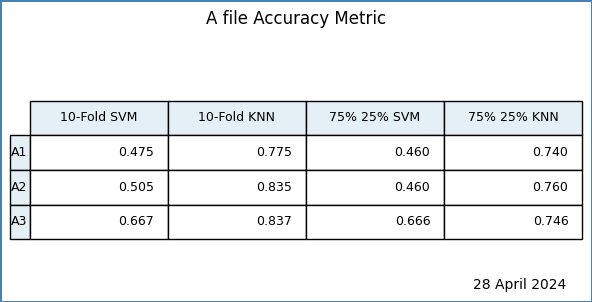

In [31]:
title_text = 'A file Accuracy Metric'
footer_text = '28 April 2024'
fig_background_color = 'white'
fig_border = 'steelblue'
data =  [
            ['10-Fold SVM', '10-Fold KNN', '75% 25% SVM', '75% 25% KNN'],
            ['A1', 0.475, 0.775,  0.46, 0.74],
            ['A2', 0.505, 0.835,  0.46,  0.76],
            ['A3', 0.667,  0.837, 0.666, 0.746]
        ]
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]
# Table data needs to be non-numeric text. Format the data
# while I'm at it.
cell_text = []
for row in data:
    cell_text.append([f'{x:1.3f}' for x in row])
# Get some lists of color specs for row and column headers
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
# Create the figure. Setting a small pad on tight_layout
# seems to better regulate white space. Sometimes experimenting
# with an explicit figsize here can produce better outcome.
plt.figure(linewidth=2,
           edgecolor=fig_border,
           facecolor=fig_background_color,
           tight_layout={'pad':1},
           figsize=(6,3)
          )
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center')
# Scaling is the only influence we have over top and bottom cell padding.
# Make the rows taller (i.e., make cell y scale larger).
the_table.scale(1, 2)
# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# Hide axes border
plt.box(on=None)
# Add title
plt.suptitle(title_text)
# Add footer
plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=10, weight='light')
# Force the figure to update, so backends center objects correctly within the figure.
# Without plt.draw() here, the title will center on the axes and not the figure.
plt.draw()
# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
plt.savefig('Data A.png',
            edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor(),
            dpi=300
            )